## Machine Learning: Patient Genetic Fingerprint
### Yi Lin

In [50]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn as sns
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score




patients_all = np.load('/Users/Ellina/Desktop/DS552/HW/HW3/ps3_genetic_fingerprints.npy')
patients_Z = np.load('/Users/Ellina/Desktop/DS552/HW/HW3/ps3_patient_zet.npy')

patients_all = pd.DataFrame(patients_all)
patients_Z = pd.DataFrame(patients_Z)

In [51]:
patients_all

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
0,2.638991,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,6.865746,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,6.548630,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.142371,...,0.0,0.000000,0.000000,0.0,0.0,0.0,3.076563,0.0,0.0,0.0
2,3.108633,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.547944,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2.821922,0.0,0.0,0.0,0.0,0.0,0.0,0.969367,0.0,6.688834,...,0.0,1.442150,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1.542966,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.947426,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.846165,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14393,2.566699,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,3.055390,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,4.862554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14395,1.948764,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,5.504622,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.051265,0.0,3.843067,...,0.0,3.599192,0.000000,0.0,0.0,0.0,3.121861,0.0,0.0,0.0


In [52]:
patients_Z

,0
0,4.143625
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
381,0.000000
382,0.000000
383,0.000000
384,0.000000


In [53]:
#Transpose DataFrame
patients_Z = patients_Z.T
patients_Z

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
0,4.143625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
patients_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Columns: 386 entries, 0 to 385
dtypes: float32(386)
memory usage: 21.2 MB


In [55]:
patients_all.describe()

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
count,14398.000000,14398.0,14398.000000,14398.000000,14398.000000,14398.0,1.439800e+04,14398.000000,14398.0,14398.000000,...,14398.000000,14398.000000,14398.000000,1.439800e+04,14398.0,14398.000000,14398.000000,14398.000000,14398.000000,14398.0
mean,1.773546,0.0,0.002773,0.000589,0.000265,0.0,4.020341e-07,0.200373,0.0,1.784183,...,0.003188,0.191314,1.846912,4.903614e-07,0.0,0.001553,0.796458,0.000113,0.001170,0.0
std,1.593963,0.0,0.040144,0.023816,0.016070,0.0,4.823983e-05,0.762326,0.0,2.606232,...,0.052764,0.721606,2.579616,5.883865e-05,0.0,0.041888,1.562516,0.009401,0.026958,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.661174,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,3.018508,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0,3.695749,...,0.000000,0.000000,4.063163,0.000000e+00,0.0,0.000000,0.849383,0.000000,0.000000,0.0
max,8.026151,0.0,1.465514,1.569437,1.326429,0.0,5.788487e-03,7.648168,0.0,11.899758,...,1.978872,7.258208,10.840201,7.060223e-03,0.0,2.561779,9.300588,1.035897,1.958296,0.0


In [56]:
#To see the number of Missing value
Missing_values = patients_all.isnull().sum()
print(Missing_values)

0      0
1      0
2      0
3      0
4      0
      ..
381    0
382    0
383    0
384    0
385    0
Length: 386, dtype: int64


##### No missing values. 

In [57]:
#Reference: https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering
#Reference: https://www.kaggle.com/victorambonati/unsupervised-anomaly-detection

features = []
for i in range(386):
    features.append(i)
print(features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# 1. Cluster data with K-mean (different values of K)

### 1.1 n=2

In [58]:
patients_all = patients_all.iloc[:].values
#X = FP_data

In [59]:
patients_all.shape

(14398, 386)

In [60]:
kmean=KMeans(n_clusters=2)
kmean.fit(patients_all)
kmean.cluster_centers_

array([[ 2.41256738e+00,  0.00000000e+00,  4.39637573e-03,
         6.78888173e-04,  2.17609733e-04,  0.00000000e+00,
        -5.22959454e-12,  3.43833566e-01,  0.00000000e+00,
         3.04358292e+00,  0.00000000e+00,  1.20443106e-03,
         5.61121851e-08,  5.76476634e-01,  1.64536672e-04,
         7.65086555e+00,  1.01360703e+00,  5.48419426e-04,
         2.80819251e-04,  1.80053292e-03,  3.07027745e+00,
         1.41355419e+00,  0.00000000e+00,  6.09776238e-04,
         4.44052966e-06, -5.60248736e-10,  0.00000000e+00,
         6.02428436e+00,  5.09122992e+00,  2.27698016e+00,
         2.81121969e+00,  0.00000000e+00,  4.96556187e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.60873649e-04,  2.16231346e+00,  2.64019385e-04,
         1.12150073e-01,  1.13682330e+00,  1.35987590e-03,
         0.00000000e+00,  6.22335291e+00,  2.29478884e+00,
         0.00000000e+00,  2.36548662e+00,  0.00000000e+00,
         3.29347653e-03,  4.33515453e+00,  2.62160897e-0

In [61]:
kmean.labels_

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

### 1.2 n=3

In [62]:
kmean=KMeans(n_clusters=3)
kmean.fit(patients_all)
kmean.cluster_centers_


array([[ 8.8541812e-01,  0.0000000e+00,  5.1389425e-04, ...,
         2.7176976e-04,  2.8015664e-03,  0.0000000e+00],
       [ 2.7191644e+00,  0.0000000e+00,  6.3275918e-03, ...,
         7.1304385e-10, -1.8626451e-08,  0.0000000e+00],
       [ 1.7088579e+00,  0.0000000e+00, -1.5366822e-08, ...,
         2.8376235e-10,  4.0745363e-09,  0.0000000e+00]], dtype=float32)

In [63]:
kmean.labels_

array([0, 2, 1, ..., 0, 2, 0], dtype=int32)

### 1.3 n=4

In [64]:
kmean=KMeans(n_clusters=4)
kmean.fit(patients_all)
kmean.cluster_centers_

array([[ 3.0458398e+00,  0.0000000e+00,  1.2468862e-02, ...,
        -3.6379788e-11,  4.4237822e-09,  0.0000000e+00],
       [ 1.7075942e+00,  0.0000000e+00, -1.5366822e-08, ...,
         2.7648639e-10,  4.0745363e-09,  0.0000000e+00],
       [ 2.0794098e+00,  0.0000000e+00, -3.0733645e-08, ...,
         2.5421975e-04, -1.8510036e-08,  0.0000000e+00],
       [ 2.6015282e-02,  0.0000000e+00,  1.0062382e-03, ...,
         5.1339026e-05,  5.4854248e-03,  0.0000000e+00]], dtype=float32)

In [65]:
kmean.labels_

array([2, 1, 0, ..., 2, 1, 3], dtype=int32)

Since manually choosing the number of centroid, we are not pretty sure how much segregated of clusters. 

# 2. Identify the optimal number of clusters

## 2.1 Elbow Method

Use elbow curve to show a trade-off between the number of centroids and information gain.

In [66]:
#patients_all = patients_all.iloc[:].values
#print(X) 

Cluster 1 Inertia 15603762.0
Cluster 2 Inertia 11086263.0
Cluster 3 Inertia 8102023.5
Cluster 4 Inertia 5976608.0
Cluster 5 Inertia 3952101.75
Cluster 6 Inertia 3727781.0
Cluster 7 Inertia 3553955.25
Cluster 8 Inertia 3404563.5
Cluster 9 Inertia 3276232.0
Cluster 10 Inertia 3213597.75
Cluster 11 Inertia 3132123.25
Cluster 12 Inertia 3065302.5
Cluster 13 Inertia 3020104.25
Cluster 14 Inertia 2963818.25


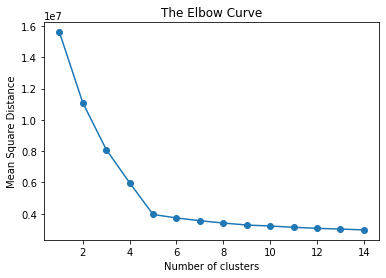

In [67]:
# Using the elbow method to find the optimal number of clusters
#Reference: https://towardsdatascience.com/k-means-clustering-with-python-code-explained-5a792bd19548#:~:text=K%20means%20clustering%20algorithm%20steps,from%20the%20centroid%20is%20minimum.
sum_squared_distance = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(patients_all)
    sum_squared_distance.append(kmeans.inertia_)
    print('Cluster', i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,15),sum_squared_distance, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Square Distance') ##WCSS stands for total within-cluster sum of square
plt.show()

- We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then select the number of clusters where the change in WCSS begins to level off (elbow method).
- WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

In [68]:
kmean= KMeans(n_clusters=5, random_state=0)
kmean.fit(patients_all)

KMeans(n_clusters=5, random_state=0)

In [69]:
kmean.cluster_centers_

array([[ 2.3896253e+00,  0.0000000e+00,  1.1769892e-04, ...,
         2.9103830e-11,  4.4237822e-09,  0.0000000e+00],
       [ 2.5596976e-02,  0.0000000e+00,  1.0105175e-03, ...,
         5.1557356e-05,  5.5087516e-03,  0.0000000e+00],
       [ 1.6975162e+00,  0.0000000e+00, -1.5599653e-08, ...,
         2.6193447e-10,  4.0745363e-09,  0.0000000e+00],
       [ 3.0511498e+00,  0.0000000e+00,  1.2451595e-02, ...,
        -2.9103830e-11,  4.4237822e-09,  0.0000000e+00],
       [ 1.7833451e+00,  0.0000000e+00, -1.9324943e-08, ...,
         4.9764349e-04,  4.4237822e-09,  0.0000000e+00]], dtype=float32)

In [70]:
kmean.labels_

array([4, 2, 3, ..., 4, 2, 1], dtype=int32)

## 2.2 Silhouette Score

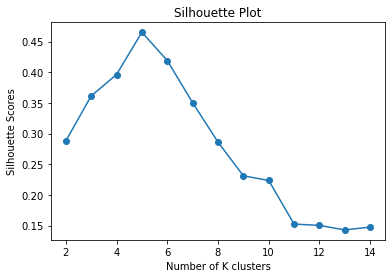

In [71]:
silhouette_scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(patients_all)
    score = silhouette_score(patients_all, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(score)
plt.plot(range(2,15),silhouette_scores, marker='o')
plt.title('Silhouette Plot')
plt.xlabel('Number of K clusters')
plt.ylabel('Silhouette Scores') 
plt.show()


# 3. Data Visulization clusters via PCA

### 3.1 Data Standardization

In [72]:
#Data Standardization
scaler = StandardScaler()
patients_all_std = scaler.fit_transform(patients_all)
patients_Z_std = scaler.fit_transform(patients_Z)

#print(patients_all_std)

In [73]:
#Fit our standardized data using PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(patients_all_std)
#pca = PCA(n_components=2)
#principalComponents_Z = pca.fit_transform(patients_Z_std)



### 3.2 Explore number of principal components

([<matplotlib.axis.XTick at 0x128f35df0>,
 <a list of 15 Text major ticklabel objects>)

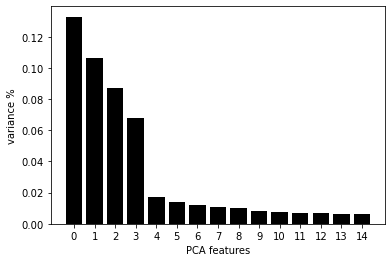

In [74]:
# Plot the explained variances
#Decide how many features we'd like to keep based on the comulative variance plot
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

- Reference: https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
- The graph show the amount of variance captured (y-axis) depending on the number of components we includd (x-axis). 
- It shows that the first four components explain the majority of the variance in our data. For this visualization use case, we will quickly plot just the first four. We do this to notice if there are any clear clusters.



### 3.3 Perform PCA with chosen number of components  = 2

In [75]:
#We choose three components, 3-4 seems the right choice accoeding to the previous graph.
#However, we can't plot 4 principle component, so we need 2 component to visualize. 

#fit the model the our data with the selected number of components = 2. 
#pca = PCA(n_components=3)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(patients_all_std)


principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Component 1', 'Component 2'])

In [76]:
#We calculated resulting components scores for the elements in our data set
print(principalComponents)

[[ 3.618288   3.18701  ]
 [-8.250566   6.629702 ]
 [-6.2771096 -7.9232674]
 ...
 [ 4.641646   1.8707954]
 [-5.512394   6.3963175]
 [12.373665  -1.1698672]]


### 3.4 K-means clustering with PCA Results

In [77]:
#We have chosed 5 culsters, so we run K-means with number of clusters = 5. 
#Same initalizer and randome state as before. 
kmeans_pca = KMeans(n_clusters = 5,random_state=0)


In [78]:
#We fit our data with the k-means pca model
kmeans_pca.fit(principalComponents)

KMeans(n_clusters=5, random_state=0)

In [79]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=5, n_jobs=None, precompute_distances='auto')

In [80]:
#We create a new data frame with PCA scores and assigned clusters. 
#The last column we add contains the pca k-means clustering labels.
kmeans_clustering_labels = pd.DataFrame(kmeans_pca.labels_, columns=['cluster'])  
 
principalDf = pd.concat([principalDf, kmeans_clustering_labels], axis=1)
 
principalDf.tail(10)

,Component 1,Component 2,cluster
14388,-5.754873,-7.839734,2
14389,-0.626724,-3.939633,3
14390,0.420724,-3.495847,3
14391,-8.512957,8.190556,0
14392,-6.937363,5.829101,0
14393,1.898537,3.278012,4
14394,10.507362,0.778284,1
14395,4.641646,1.870795,4
14396,-5.512394,6.396317,0
14397,12.373665,-1.169867,1


In [81]:
#We create a new column named ‘Segment’ and map the four clusters directly inside it.
principalDf['Segment'] = principalDf['cluster'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth'})



In [82]:
principalDf.head()

,Component 1,Component 2,cluster,Segment
0,3.618288,3.187010,4,fifth
1,-8.250566,6.629702,0,first
2,-6.277110,-7.923267,2,third
3,-7.447530,6.526961,0,first
4,-7.067520,4.746666,0,first


### 3.5 Visulaize the segment with respect to 2 components


/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


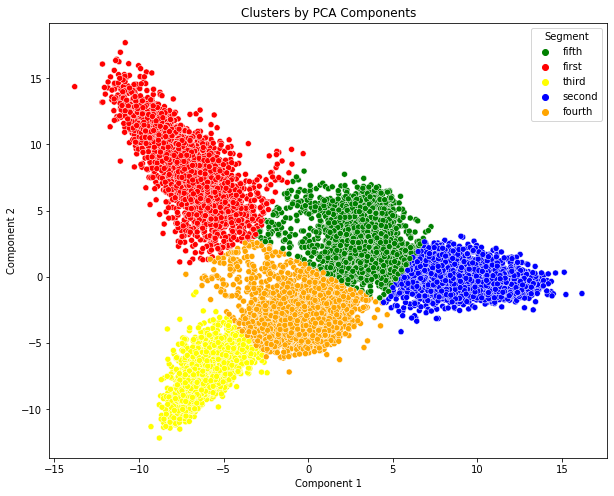

In [83]:
#Plot data by PCA components. The X axis is the first component, Y axis is the second.
x_axis = principalDf['Component 1']
y_axis = principalDf['Component 2']
plt.figure(figsize = (10,8))
color = []
sns.scatterplot(x_axis, y_axis, hue = principalDf['Segment'], palette = ['green', 'red','yellow','blue','orange'])
plt.title('Clusters by PCA Components')
plt.show()

# 4. Patient Z

In [84]:
patients_all = np.load('/Users/Ellina/Desktop/DS552/HW/HW3/ps3_genetic_fingerprints.npy')
patients_Z = np.load('/Users/Ellina/Desktop/DS552/HW/HW3/ps3_patient_zet.npy')


patients_all = pd.DataFrame(patients_all)
patients_Z = pd.DataFrame(patients_Z)

patients_Z = patients_Z.T
new_df = pd.concat([patients_all, patients_Z])
new_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
14394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,4.862554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14395,1.948764,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,5.504622,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.051265,0.0,3.843067,...,0.0,3.599192,0.000000,0.0,0.0,0.0,3.121861,0.0,0.0,0.0
14397,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,6.366816,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
0,4.143625,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [85]:
new_df.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
0,2.638991,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,6.865746,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,6.548630,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.142371,...,0.0,0.000000,0.000000,0.0,0.0,0.0,3.076563,0.0,0.0,0.0
2,3.108633,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.547944,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2.821922,0.0,0.0,0.0,0.0,0.0,0.0,0.969367,0.0,6.688834,...,0.0,1.442150,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1.542966,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.947426,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.846165,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,4.862554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14395,1.948764,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,5.504622,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.051265,0.0,3.843067,...,0.0,3.599192,0.000000,0.0,0.0,0.0,3.121861,0.0,0.0,0.0
14397,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,6.366816,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [86]:
#Data Standardization
scaler = StandardScaler()
new_df_std = scaler.fit_transform(new_df)

In [87]:
pca = PCA(n_components=2)
principalComponents_new = pca.fit_transform(new_df_std)


principalDf_new = pd.DataFrame(data = principalComponents_new, columns = ['Component 1', 'Component 2'])

principalDf_new.tail(10)

,Component 1,Component 2
14389,-0.626599,-3.940414
14390,0.420784,-3.496900
14391,-8.513258,8.191062
14392,-6.937542,5.829371
14393,1.898293,3.277334
14394,10.507718,0.779714
14395,4.641522,1.870501
14396,-5.512594,6.396872
14397,12.374107,-1.168283
14398,-0.151101,-1.992698


In [88]:
principalDf_new.shape

(14399, 2)

In [89]:
#z_person = ( -1.992703, 0.151103)

In [90]:
kmeans_pca=KMeans(n_clusters=5,random_state=0)
kmeans_pca.fit(principalDf_new)
kmeans_pca.cluster_centers_

array([[ 3.3300884 ,  2.9316509 ],
       [-5.990805  , -7.3488703 ],
       [-7.128895  ,  8.217498  ],
       [-0.39534023, -2.960218  ],
       [ 8.997416  , -0.10278739]], dtype=float32)

In [91]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=5, n_jobs=None, precompute_distances='auto')

In [92]:
kmeans_clustering_labels = pd.DataFrame(kmeans_pca.labels_, columns=['cluster'])  
 
principalDf_new = pd.concat([principalDf_new, kmeans_clustering_labels], axis=1)
 
principalDf_new.tail(5)

,Component 1,Component 2,cluster
14394,10.507718,0.779714,4
14395,4.641522,1.870501,0
14396,-5.512594,6.396872,2
14397,12.374107,-1.168283,4
14398,-0.151101,-1.992698,3


In [93]:
#We create a new column named ‘Segment’ and map the four clusters directly inside it.
principalDf_new['Segment'] = principalDf_new['cluster'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth'})



In [94]:
principalDf_new.tail(5)

,Component 1,Component 2,cluster,Segment
14394,10.507718,0.779714,4,fifth
14395,4.641522,1.870501,0,first
14396,-5.512594,6.396872,2,third
14397,12.374107,-1.168283,4,fifth
14398,-0.151101,-1.992698,3,fourth


In [95]:
#Patient Z is located in Segment in fourth
principalDf_new.loc[principalDf_new['Segment'] == 'fourth']


,Component 1,Component 2,cluster,Segment
11,2.644399,-0.864833,3,fourth
12,-0.146341,-2.611053,3,fourth
18,-2.136617,-2.241282,3,fourth
20,-0.547088,-2.628916,3,fourth
24,-3.199121,-3.684588,3,fourth
...,...,...,...,...
14380,1.889055,-3.471116,3,fourth
14382,-0.404153,-4.853243,3,fourth
14389,-0.626599,-3.940414,3,fourth
14390,0.420784,-3.496900,3,fourth


- There are 3189-1 = 3188 people in the cluster 3 or segment fourth (not including the patient Z)